In [4]:
import numpy as np
from matplotlib import pyplot as plt

Erzeugt eine Punktwolke mit Verzerrung `y_factor`, Drehung `angle` und Translation `shift`.

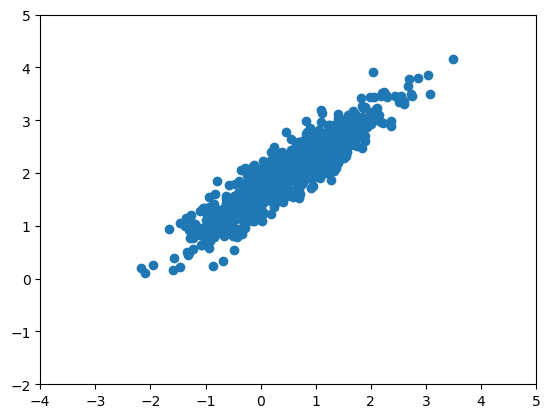

In [5]:
y_factor = 0.2
angle = np.pi * 0.2
rotation_mat = np.array([[np.cos(angle), np.sin(angle)],[-np.sin(angle), np.cos(angle)]])
shift = [0.5, 2]

points = np.random.randn(1000, 2) * np.sqrt(1)
points[:,1] *= y_factor
points = points @ rotation_mat
points += shift
plt.xlim(-4, 5)
plt.ylim(-2, 5)
plt.scatter(points[:,0], points[:,1]);

[[-0.58778525  0.80901699]
 [ 0.80901699  0.58778525]]
Eigenvektoren:
 [[ 0.80634598 -0.59144413]
 [ 0.59144413  0.80634598]]
Verhältnis der Hauptrichtungen: 4.994238952138668


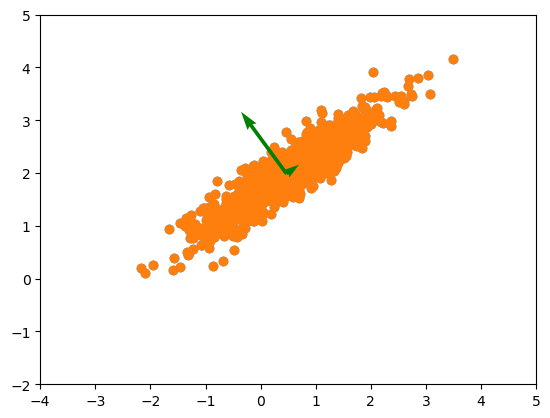

In [7]:
# Analytische Lösung
plt.xlim(-4, 5)
plt.ylim(-2, 5)
plt.scatter(points[:,0], points[:,1])
exact_origins = np.array([[shift[0], shift[0]], [shift[1], shift[1]]])
exact_basis = np.array([[1, 0], [0, 1]]) @ rotation_mat
exact_basis[[1,0]] = exact_basis[[0,1]] # Vertauscht fuer matplotlib
plt.quiver(exact_origins[0,:], exact_origins[1,:], exact_basis[:,0], exact_basis[:,1], scale=np.array([30, 30 * y_factor]), color="red");
print(exact_basis)
# TODO:
# - Berechne die zwei Hauptrichtungen aus der Punktwolke und plotte sie über der analytischen Lösung
# - Berechne das Verhältnis der Hauptrichtungen und vergleiche es mit y_factor
# Gespiegelte Vektoren stellen keinen Fehler dar.
# Mittelwerte berechnen
mean_vals = np.mean(points, axis=0)
p = points - mean_vals

# Berechnen von xtx
xtx = p.T @ p

# Berechnen der Eigenwerte und Eigenvektoren
Lambda, V = np.linalg.eig(xtx)
Lambda = np.sqrt(Lambda)

# Plotten der Eigenvektoren
plt.xlim(-4, 5)
plt.ylim(-2, 5)
plt.scatter(points[:,0], points[:,1])
plt.quiver([mean_vals[0]]*2, [mean_vals[1]]*2, V[0,:], V[1,:], scale=Lambda, color="green")

# Verhältnis der Hauptrichtungen anzeigen
ratio = Lambda[0] / Lambda[1]
print("Eigenvektoren:\n", V)
print("Verhältnis der Hauptrichtungen:", ratio)

# Plot anzeigen
plt.show()